In [1]:
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn.model_selection import KFold

In [2]:
from keras.datasets import mnist
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
#Load local images
imageDir = "C:/Users/David/D7041E_Artificial_Intelligence/Jupyter_Notebooks/Labs/Lab1/Data_set/Images_28x28"
localImages = []
for filename in os.listdir(imageDir):
    localImage = mpimg.imread(os.path.join(imageDir, filename))
    if (filename is not None):
        localImages.append(localImage)
localImages = np.array(localImages)

In [4]:
#Plots the sample in lst at index i
def plotSample(lst, i):
    img = lst[i]
    plt.imshow(img)
    plt.show()
    plt.close()

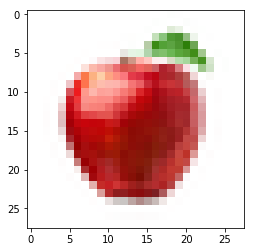

Min:  0.0 
Max:  1.0 
Mean:  0.7695562 
StdDev:  0.33908373


In [5]:
#Sample min, max, mean and standard deviation
index = 2
img = localImages[index]
plotSample(localImages, index)
print("Min: ", np.min(img), "\nMax: ", np.max(img), 
      "\nMean: ", np.mean(img), "\nStdDev: ", np.std(img))

In [6]:
#Plots the image X
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(28,28,3))
    plt.show()
    plt.close()

In [15]:
def plotDataCov(data):
    cov_matrix = np.cov(data, rowvar=True, bias=False)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
    ax0 = plt.subplot(2,2,1)
    sns.heatmap(cov_matrix, cmap="GnBu", vmin=0)    
    ax1 = plt.subplot(2,2,2)
    ax1.scatter(range(2352), data[0,:], s=40)

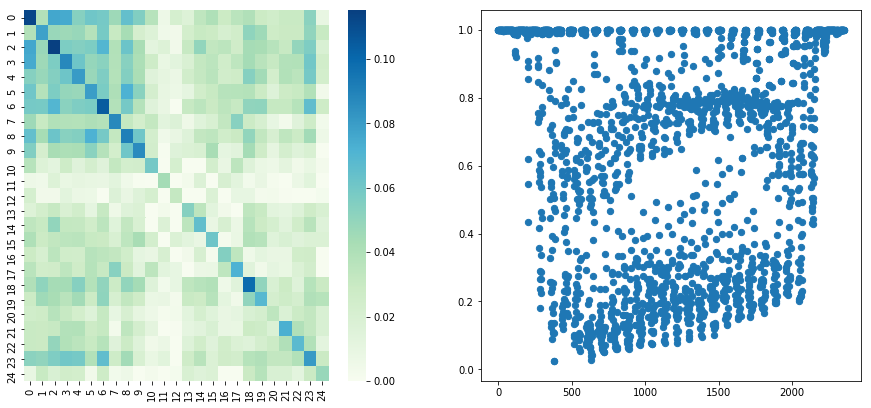

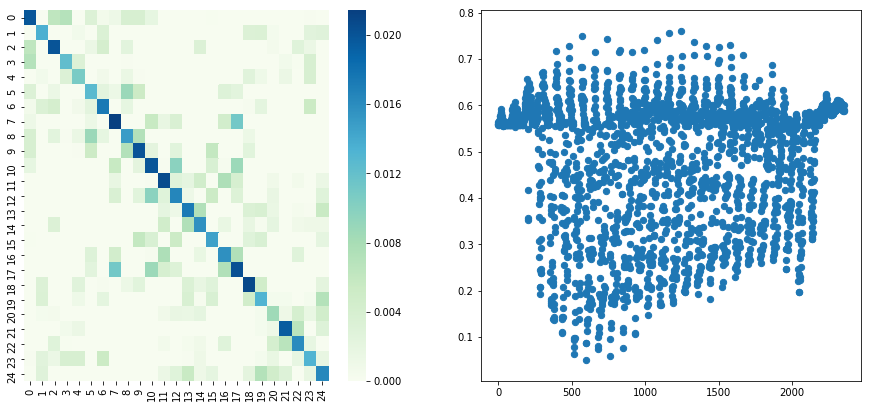

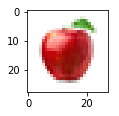

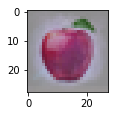

In [20]:
#Image whitening
localFlat = localImages.reshape(localImages.shape[0], localImages.shape[1]*localImages.shape[2]*localImages.shape[3]) #Flaten the data
X_norm = localFlat / 255
X_norm = X_norm - X_norm.mean(axis=0)
cov = np.cov(X_norm, rowvar=True) #Covariance
U,S,V = np.linalg.svd(cov)

epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

plotDataCov(localFlat)
plotDataCov(X_ZCA_rescaled)


plotImage(localFlat[2])
#plotImage(X_ZCA[12, :])
plotImage(X_ZCA_rescaled[2, :])

In [9]:
def predict(Test_set, Train_set, Train_labels, k):
    num_test = Test_set.shape[0]
    Lpred = np.zeros(num_test, dtype=Train_labels.dtype)
    
    for i in range(num_test):
        distances = np.sqrt(np.sum(np.square(np.abs(Train_set-Test_set[i,:])),axis=1))
        top_k = np.zeros(k, dtype=Train_labels.dtype)
        nearestN = 0
        
        for j in range (0, k):
            min_index = np.argmin(distances)
            if j == 0:
                nearestN = Train_labels[min_index]
            top_k[j] = Train_labels[min_index]
            np.put(distances, min_index, np.inf)
        
        if np.bincount(top_k).max() == 1:
            Lpred[i] = nearestN
        else:
            Lpred[i] = np.bincount(top_k).argmax()
    return Lpred

In [10]:
#Load the MNIST data
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()
num_sample=900
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]
Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)

In [11]:
folds = 3
kfold = KFold(folds, True, 1)
dataFolds = list(kfold.split(Tr_set))
labelFolds = list(kfold.split(Ltr_set))

foldRes = [[], [], []]
for fold in range(folds):
    trainD, testD = dataFolds[fold]
    trainL, testL = labelFolds[fold]
    
    trainD = Tr_set[trainD]
    trainL = Ltr_set[trainL]
    testD = Tr_set[testD]
    testL = Ltr_set[testL]
    
    for k in range(1, 6):
        Labels_predicted = predict(testD, trainD, trainL, k)
        foldRes[fold][k-1] = np.mean(Labels_predicted == testL)
        print("Accuracy for (F_",fold+1,", K_",k,"): ", foldRes[fold][k-1])
    print()

Accuracy for (F_ 1 , K_ 1 ):  0.911
Accuracy for (F_ 1 , K_ 2 ):  0.911
Accuracy for (F_ 1 , K_ 3 ):  0.916
Accuracy for (F_ 1 , K_ 4 ):  0.9
Accuracy for (F_ 1 , K_ 5 ):  0.906

Accuracy for (F_ 2 , K_ 1 ):  0.914
Accuracy for (F_ 2 , K_ 2 ):  0.914
Accuracy for (F_ 2 , K_ 3 ):  0.916
Accuracy for (F_ 2 , K_ 4 ):  0.908
Accuracy for (F_ 2 , K_ 5 ):  0.911

Accuracy for (F_ 3 , K_ 1 ):  0.927
Accuracy for (F_ 3 , K_ 2 ):  0.927
Accuracy for (F_ 3 , K_ 3 ):  0.914
Accuracy for (F_ 3 , K_ 4 ):  0.911
Accuracy for (F_ 3 , K_ 5 ):  0.907



In [12]:
Test_images = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
lpK1 = predict(Test_images, Tr_set, Ltr_set, 1)
print("Done...")
lpK3 = predict(Test_images, Tr_set, Ltr_set, 3)
print("Done...")
accK1 = np.mean(lpK1==L_test)
print("Done...")
accK3 = np.mean(lpK3==L_test)
print("Done...")
print()
print("Accuracy for K1:", accK1)
print("Accuracy for K3:", accK3)

Accuracy for K1: 0.9191
Accuracy for K3: 0.9215


In [13]:
kValues =[1, 2, 3, 4, 5]
accK1Arr = ()
np.array()
plt.plot(foldRes[0], kValues,)
plt.show()
plt.close()

NameError: name 'foldRes' is not defined